# Pymaceuticals Inc.
---

### Analysis: The sample size was evenly distributed between female and male (49 % v 51% respectively). Of the drugs tested, Capomulin and Ramicane and Infubinol and Ceftamin were the most similar in efficacy. Mouse Weight and Tumor Volume are positively correlated with the Capomulin regimen.

- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
print(mouse_metadata)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]


In [5]:
print(study_results)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


In [6]:
# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count =  data_complete['Mouse ID'].nunique()
mice_count

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_id_column = 'Mouse ID'
timepoint_column = 'Timepoint'

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicates                                                   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
if not duplicates.empty:
    print("Mouse IDs with duplicate Timepoints:")
    print(duplicates[[mouse_id_column, timepoint_column]])
else:
    print("No duplicate Timepoints found for any mouse IDs.")

Mouse IDs with duplicate Timepoints:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_complete.loc[data_complete['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for better readability
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Deviation', 'Tumor Volume Std Err.SEM']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Err.SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

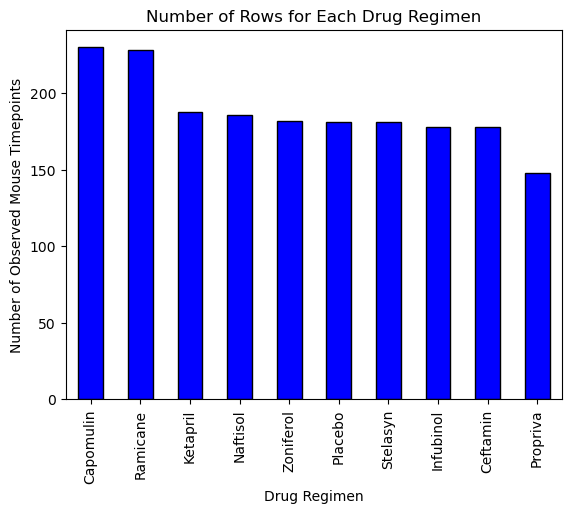

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
counts_per_regimen = clean_data['Drug Regimen'].value_counts()

# Plot the bar chart using DataFrame.plot()
counts_per_regimen.plot(kind='bar', color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()


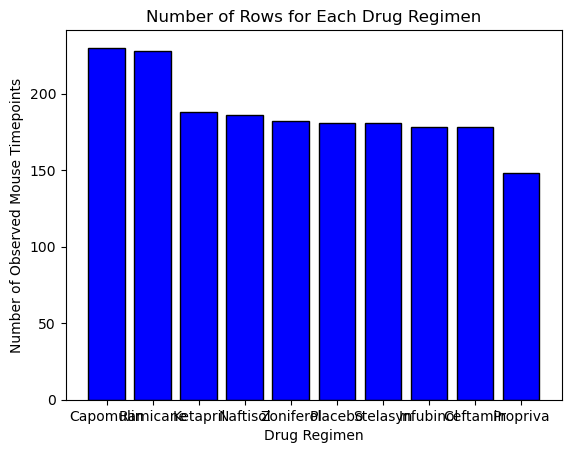

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
counts_per_regimen = clean_data['Drug Regimen'].value_counts()

# Create a bar chart using pyplot
plt.bar(counts_per_regimen.index, counts_per_regimen, color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()

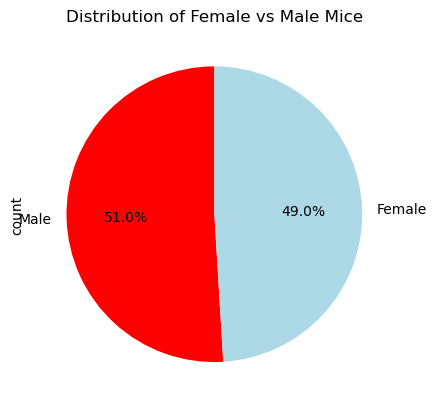

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_distribution = clean_data['Sex'].value_counts()

# Plot the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'lightblue'], startangle=90)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

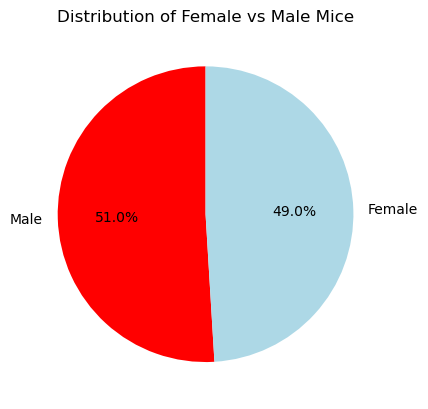

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
gender_distribution = clean_data['Sex'].value_counts()

# Create a pie chart using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['red', 'lightblue'], startangle=90)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# List of treatment regimens to consider
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the selected treatment regimens
selected_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = selected_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume for each mouse
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#Create loop
# Iterate over each treatment regimen
for drug in selected_regimens:
    # Filter the DataFrame for the specific drug
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"].values
    
    # Append the tumor volume data to the list
    tumor_vol.append(tumor_volumes)

In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_data = final_tumor_volume['Tumor Volume (mm3)']

# use pandas to give quartile calculations
quartiles = regimen_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 37.1877438025
The upper quartile is: 59.930261755
The interquartile range is: 22.742517952499995
The the median is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [35]:
outliers = []
for i, regimen in enumerate(selected_regimens):
    quartiles = tumor_vol_data[i].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    outliers.append({
        'Regimen': regimen,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Potential Outliers': potential_outliers.tolist()
    })

# Display the results
for outlier_info in outliers:
    print(f"Regimen: {outlier_info['Regimen']}")
    print(f"Lower Bound: {outlier_info['Lower Bound']}")
    print(f"Upper Bound: {outlier_info['Upper Bound']}")
    print(f"Potential Outliers: {outlier_info['Potential Outliers']}\n")
 

Regimen: Capomulin
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Regimen: Ramicane
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Regimen: Infubinol
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Regimen: Ceftamin
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



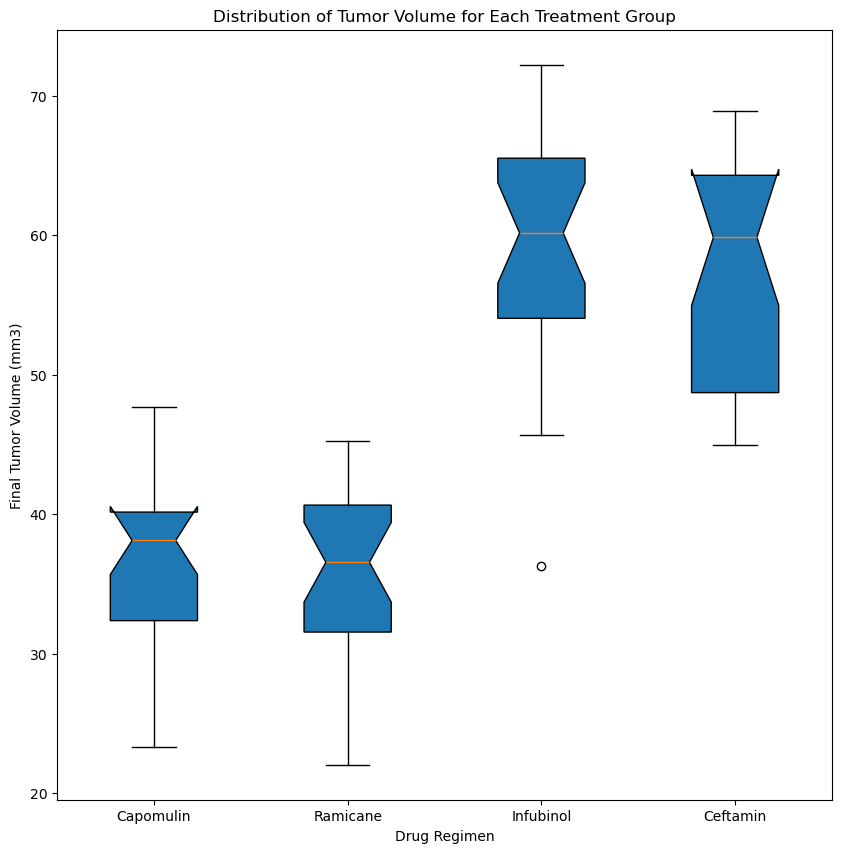

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_by_regimen = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].tolist() for regimen in selected_regimens]

# Create a box plot using matplotlib
plt.figure(figsize=(10, 10))
plt.boxplot(data_by_regimen, labels=selected_regimens, notch=True, sym="o", patch_artist=True)

# Add title and labels
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

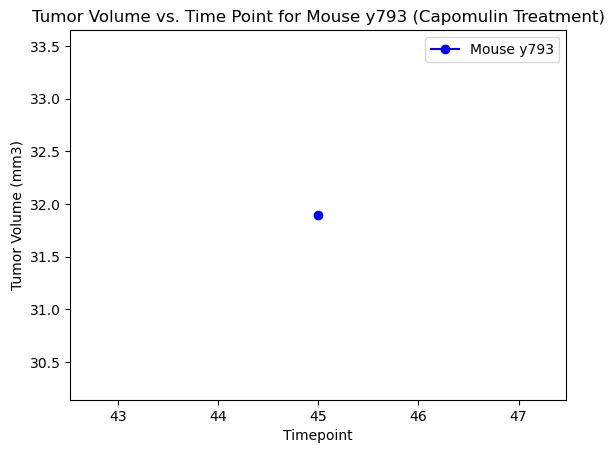

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin (Mouse ID y793)
mouse_id_capomulin = 'y793'
mouse_data_capomulin = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == 'Capomulin') & (final_tumor_volume['Mouse ID'] == mouse_id_capomulin)]

# Create a line plot using matplotlib
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-', label=f'Mouse {mouse_id_capomulin}')

# Add title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id_capomulin} (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()  # Add legend to show the mouse ID

# Show the plot
plt.show()

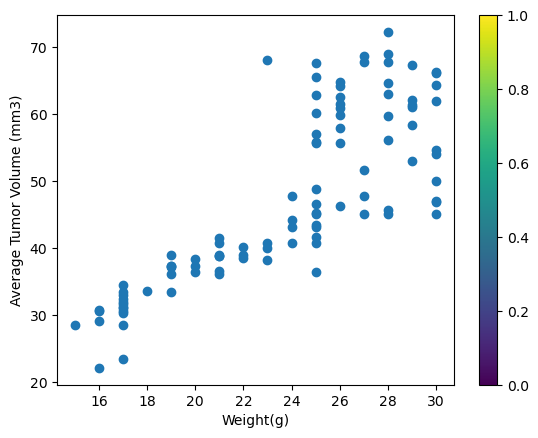

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(final_tumor_volume['Weight (g)'],final_tumor_volume['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
#clb.set_label("Median Income")
plt.show()

## Correlation and Regression

0.8767060403658118


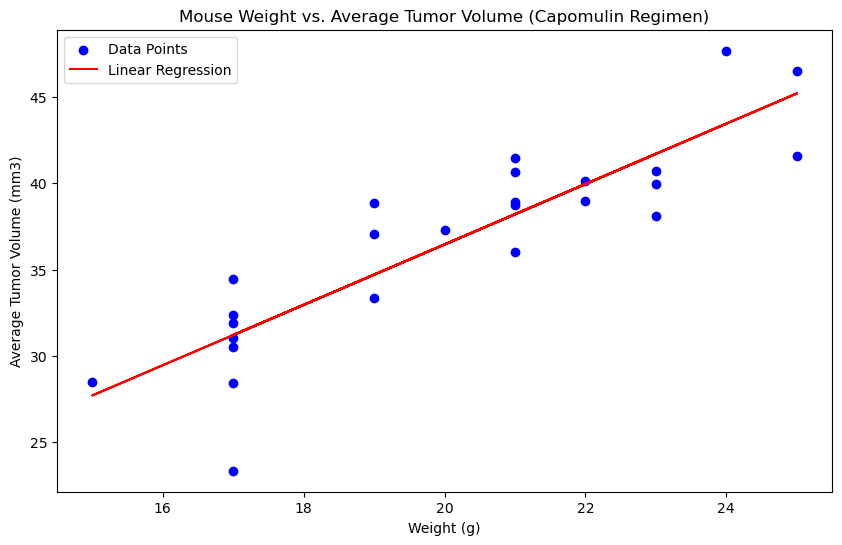

In [74]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Filter data for Capomulin regimen
capomulin_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate correlation coefficient
correlation_coefficient = average_tumor_volume.corr(mouse_weights)

# Calculate correlation coefficient
correlation_coefficient = average_tumor_volume.corr(mouse_weights)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Create a linear regression line
regression_line = slope * mouse_weights + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Data Points')
plt.plot(mouse_weights, regression_line, color='r', label='Linear Regression')

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
print (correlation_coefficient)
# Show the plot
plt.show()
